# [EDA] 了解變數分布狀態: Bar & KDE (density plot)

# To do: 變項的分群比較
1. 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
2. 以年齡區間為 x, target 為 y 繪製 barplot

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將資料依照歲數, 將 20 到 70 歲切成11個區間? (In[4], Hint : 使用 numpy.linspace),  
  送入繪圖前的除了排序外, 還要注意什麼? (In[5])
- 如何調整對應資料, 以繪製長條圖(bar chart)? (In[7])

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline
plt.style.use('ggplot')

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [4]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

#自 20 到 70 歲，切 11 個點 (得到 10 組)
"""
Your Code Here
"""
bin_cut =  np.linspace(20, 70, 11).astype(int)
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut) 

# 顯示不同組的數量
print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

(35, 40]    42868
(40, 45]    41406
(30, 35]    39440
(45, 50]    35135
(50, 55]    34942
(55, 60]    33120
(25, 30]    32862
(60, 65]    27476
(20, 25]    12159
(65, 70]     8103
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25, 30]"
1,0,16765,45.931507,"(45, 50]"
2,0,19046,52.180822,"(50, 55]"
3,0,19005,52.068493,"(50, 55]"
4,0,19932,54.608219,"(50, 55]"


In [5]:
year_group_sorted = list(age_data['YEARS_BINNED'].value_counts().sort_index().index)
year_group_sorted

[Interval(20, 25, closed='right'),
 Interval(25, 30, closed='right'),
 Interval(30, 35, closed='right'),
 Interval(35, 40, closed='right'),
 Interval(40, 45, closed='right'),
 Interval(45, 50, closed='right'),
 Interval(50, 55, closed='right'),
 Interval(55, 60, closed='right'),
 Interval(60, 65, closed='right'),
 Interval(65, 70, closed='right')]

In [6]:
age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[0]) & (age_data['TARGET'] == 0)]

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
15,0,8728,23.912329,"(20, 25]"
45,0,7974,21.846575,"(20, 25]"
61,0,7907,21.663014,"(20, 25]"
228,0,8302,22.745205,"(20, 25]"
262,0,9105,24.945205,"(20, 25]"
265,0,9011,24.687671,"(20, 25]"
297,0,8400,23.013699,"(20, 25]"
351,0,8598,23.556164,"(20, 25]"
373,0,8650,23.698630,"(20, 25]"
394,0,8922,24.443836,"(20, 25]"


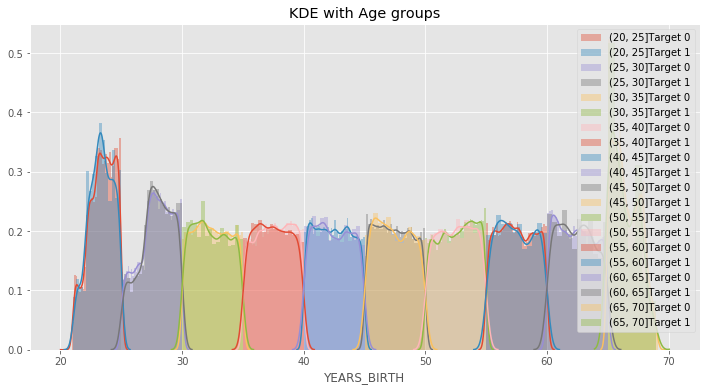

In [7]:
# 繪圖前先排序 / 分組
"""
Your Code Here
"""
year_group_sorted = list(age_data['YEARS_BINNED'].value_counts().sort_index().index)

plt.figure(figsize=(12,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]) + 'Target 0')
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]) + 'Target 1')
plt.title('KDE with Age groups')
plt.legend(loc=0)

plt.show()

In [8]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20, 25]",0.123036,8532.795625,23.377522
"(25, 30]",0.111436,10155.219250,27.822518
"(30, 35]",0.102814,11854.848377,32.479037
"(35, 40]",0.089414,13707.908253,37.555913
"(40, 45]",0.078491,15497.661233,42.459346
"(45, 50]",0.074171,17323.900441,47.462741
"(50, 55]",0.066968,19196.494791,52.593136
"(55, 60]",0.055314,20984.262742,57.491131
"(60, 65]",0.052737,22780.547460,62.412459


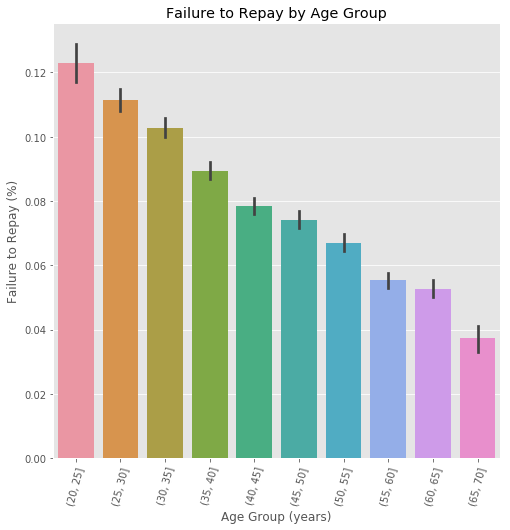

In [9]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = age_data['YEARS_BINNED']
py = age_data['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');